In [31]:
# Import modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets

# Loading Iris Dataset into Pandas Dataframe

In [14]:
iris = datasets.load_iris()
df = pd.DataFrame(
    {
    'sepal length' : iris.data[:,0],
    'sepal width' : iris.data[:,1],
    'petal length' : iris.data[:,2],
    'petal width' : iris.data[:,3],
    'species' : iris.target
    }
)

list(df.columns)[:-1]

['sepal length', 'sepal width', 'petal length', 'petal width']

## Feature Selection and Train Test Split

In [28]:
from sklearn.model_selection import train_test_split

X = df[['sepal length', 'sepal width', 'petal length', 'petal width']] # features
y = df['species'] # labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% train test split

## Model Selection: Random Forest Classifier

In [29]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100) # try with 100 estimators
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## Model Accuracy

In [30]:
from sklearn import metrics

print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')

Accuracy: 0.9555555555555556


## Finding Important Features

In [21]:
feature_imp = pd.Series(model.feature_importances_, index=iris.feature_names).sort_values(ascending=False)
feature_imp

petal width (cm)     0.463815
petal length (cm)    0.426077
sepal length (cm)    0.083508
sepal width (cm)     0.026600
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


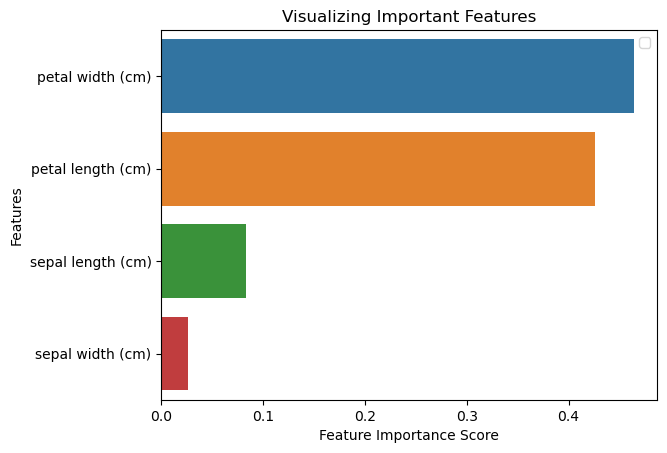

In [36]:
%matplotlib inline

# Bar plot of feature importance
sns.barplot(x = feature_imp, y = feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Visualizing Important Features')
plt.legend()
plt.show()

## Modifying Features

Sepal width doesn't seem too important of a feature. We can remove it and retrain our model with the more important features. 

In [ ]:
from sklearn.cross_validation import train_test_split

X = df[['petal length', 'petal width', 'sepal length']]
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
